K-Nearest Neighbour Alogrithm is based on "**Similar cases with same labels are near to each other**"

This algorithm takes bunch of labeled points and uses them to learn how to label other points.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [6]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

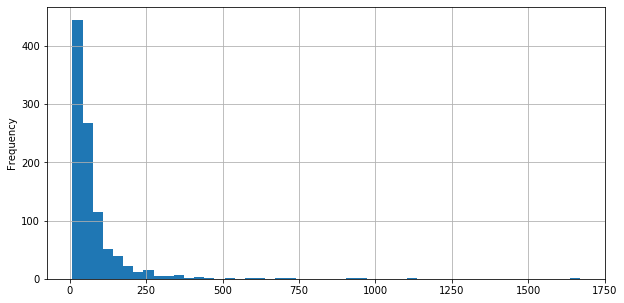

In [17]:
df['income'].plot(kind='hist', bins=50, grid=True, figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000003DE0956588>]],
      dtype=object)

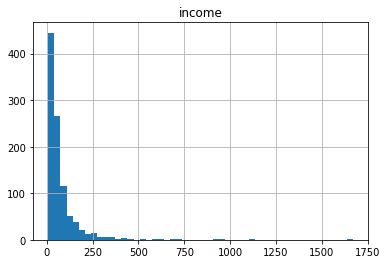

In [9]:
df.hist(column='income', bins=50)

define the features set X:

In [18]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [19]:
df.dtypes

region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

In [28]:
x = df.columns.to_list()
x.pop()
x

['region',
 'tenure',
 'age',
 'marital',
 'address',
 'income',
 'ed',
 'employ',
 'retire',
 'gender',
 'reside']

In [33]:
X = df[x]
X.iloc[0:5]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [34]:
Y = df['custcat']
Y.iloc[0:5]

0    1
1    4
2    3
3    1
4    3
Name: custcat, dtype: int64

#### normalize Data

In [37]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [38]:
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

Training and Testing split

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(800, 11)   (800,)
(200, 11)   (200,)


Classification

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
k = 4
neighbour = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
neighbour

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

Predicting 

In [44]:
yhat = neighbour.predict(x_test)

In [46]:
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

Accuracy Evaluations

In [47]:
from sklearn import metrics 

In [48]:
print('Train set Accuracy', metrics.accuracy_score(y_train, neighbour.predict(x_train)))
print('Test set Accuracy', metrics.accuracy_score(y_test, neighbour.predict(x_test)))

Train set Accuracy 0.5475
Test set Accuracy 0.32


####  practise

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
n = KNeighborsClassifier(n_neighbors=6)
n

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [52]:
n.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [54]:
yhat = n.predict(x_train)

#### Accuray

In [56]:
from sklearn.metrics import accuracy_score

In [59]:
print('Train Accuracy ', accuracy_score(y_train, n.predict(x_train)))
print('Test Accuracy ', accuracy_score(y_test, n.predict(x_test)))

Train Accuracy  0.51625
Test Accuracy  0.31
